# ICA

ICA significa análisis de componentes independientes (en inglés, *Independent Component Analysis*) también es conocido como *Blind Source Separation problem* y *coktail-party problem*.  ICA es un método de reducción de la dimensión de tipo lineal, que transforma el conjunto de datos en un conjunto de componentes independientes. 

ICA asume que cada muestra de datos es una mezcla de señales independientes y su objetivo es encontrar estos componentes.

Ahora, en el centro de ICA hay un término llamado "Independencia". Es importante entender este concepto en primer lugar. ¿Qué significa la independencia entre dos variables? ¿En qué se diferencia de la "correlación"? ¿Cuáles son los medios para medirla?

¿Cuándo podemos decir con seguridad que dos variables son independientes?

Suponga que $x$, $y$ son dos variables aleatorias con su pdf's $p(x)$, $p(y)$ respectivamente. Si recibimos alguna información sobre $x$ y eso no cambia cualquier conocimiento que tengamos sobre $y$, entonces podemos decir con seguridad que $x$ y $y$ son variables independientes. Podríamos decir que eso suena a ausencia de correlación. Y sí, tendríamos razón en eso, pero la correlación no es la única forma de medir la dependencia entre variables. De hecho, lo que captura la correlación es la dependencia lineal entre las variables. Si dos variables son independientes, tanto la dependencia lineal como la no lineal serán cero. La ausencia de dependencia lineal no implica independencia ya que su relación podría ser no lineal.

Tomemos un pequeño ejemplo artificial para entender esto.

Tenemos dos variables $x$, $y$ tales que:

- $p(x)$ = 1/11 para x $\in $ (-5, -4, -3, -2, -1,0,1,2,3,4,5)

- $y = x^2 $, lo que nos da $y \in (25, 16, 9, 4, 1, 0, 1, 4, 9, 16, 25)$.

Ahora calculemos la correlación entre estas dos variables:

In [1]:
import numpy as np

x = np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5])
y = np.array([25, 16, 9, 4, 1, 0, 1, 4, 9, 16, 25])

np.correlate(x, y)

array([0])

Puesto que $x$ y $y$ tienen una relación no lineal, la correlación no logra capturar esta esencia.
Por tanto, **la independencia entre variables implica una correlación cero, mientras que una correlación cero no implica independencia entre las variables**.

Como se mencionó anteriormente, ICA intenta averiguar las fuentes independientes a partir de las cuales se componen los datos. Comenzaremos con un ejemplo clásico utilizado para explicar el ICA.

Suponga que estamos escuchando las conversaciones de dos grupos de personas en una fiesta. Recibimos audio de dos sensores colocados en la habitación en diferentes lugares. Así, ambos sensores recibirán dos entradas de audio, una de cada grupo. Al final, obtendremos dos salidas, pero ambas serán una mezcla de audios de origen mezclados de acuerdo con la distancia de los grupos. Pero, queremos descifrar el audio original de estas dos entradas mixtas. Podemos utilizar ICA para lograr este objetivo. Esto se conoce generalmente como *cocktail party problem*.


Supongamos que tenemos dos fuentes de señales de audio $x_1$ y $x_2$ donde $x_1 = f(t)$ y $x_2 = g(t)$.
Ahora ambos micrófonos recibirán las señales $x_1$, $x_2$ y mezclarán estas señales de acuerdo con las siguientes reglas:

- $x_{sensor1} = a_1 \times s_1 + b_1 \times s_2$

- $x_{sensor2} = a_2 \times s_1 + b_2 \times s_2$

En forma matricial:

$$\begin{bmatrix} x_{sensor1} \\ x_{sensor2}\end{bmatrix} = \begin{bmatrix}a_1 & b_1 \\ a_2 & b_2\end{bmatrix}  \times \begin{bmatrix} s_1 \\ s_2\end{bmatrix}$$

$$\mathbf{x} = \mathbf{A} \mathbf{s}$$

dónde

- $\mathbf{A}$ es la matriz de mezcla $\begin{bmatrix}a_1 &b_1 \\ a_2 & b_2 \end{bmatrix}$
- $\mathbf{s}$ es un vector de las fuentes de las señales
- $\mathbf{x}$ es el vector de salida que se recibe

Reproduzcamos de forma simple la situación anterior mediante dos *datasets* aleatorios, uno gaussiano y otro uniforme.

In [2]:
# creacion de las senyales
np.random.seed(100)
U1 = np.random.uniform(-1, 1, 1000)
U2 = np.random.uniform(-1, 1, 1000)

G1 = np.random.randn(1000)
G2 = np.random.randn(1000)


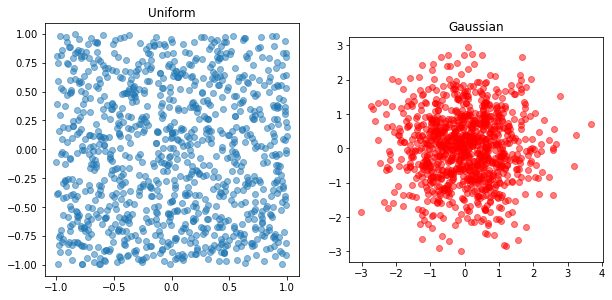

In [14]:
%matplotlib inline
# Grafica de las senyales

from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(121, aspect = "equal")
ax1.scatter(U1, U2, marker = "o",alpha=0.5)
ax1.set_title("Uniform")


ax2 = fig.add_subplot(122, aspect = "equal")
ax2.scatter(G1, G2, marker = "o", color='red', alpha=0.5)
ax2.set_title("Gaussian")


plt.show()

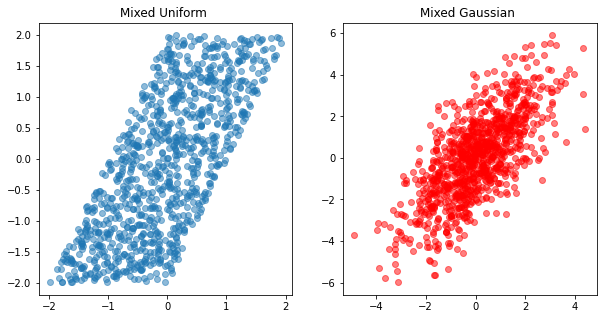

In [23]:
# ahora se realiza la mezcla de la senyales

A = np.array([[1, 0], [1, 2]]) # Se construye la matriz de mezcla

U_source = np.array([U1,U2])
U_mix = U_source.T @ A

G_source = np.array([G1, G2])
G_mix = G_source.T @ A

# Grafica del dataset

fig  = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
ax1.set_title("Mixed Uniform ")
ax1.scatter(U_mix[:, 0], U_mix[:,1], marker = "o", alpha=0.5)

ax2 = fig.add_subplot(122)
ax2.set_title("Mixed Gaussian ")
ax2.scatter(G_mix[:, 0], G_mix[:, 1], marker = "o", alpha=0.5,color='r')


plt.show()

En el mundo real, no tenemos conocimiento sobre $\mathbf{A}$ (matriz de mezcla) ni sobre $\mathbf{s}$ (vector fuente). Solo conocemos la señal recibida a la salida. Necesitamos encontrar los vectores fuente del conjunto de datos y la matriz de mezcla.
Supongamos que de alguna manera conocemos la matriz de mezcla, entonces nos facilita mucho las cosas. Necesitamos encontrar la inversa de la matriz A, tomar su producto escalar con el conjunto de datos y listo.

$$\mathbf{W} = \mathbf{A}^{-1}$$
$$\mathbf{s} = \mathbf{W} \mathbf{x}$$

ICA utiliza este método para encontrar las señales de origen.

## Implementación de ICA

Analicemos e implementemos el algoritmo de ICA paso a paso. El algoritmo ICA hace dos suposiciones principales:
1. Todas las señales fuente son independientes entre sí.
2. Todas las señales fuente tienen una distribución **no** Gaussiana.

ICA utiliza los anteriores supuestos para encontrar la inversa de la matriz de mezcla.

Supongamos que tenemos un conjunto de datos $\mathbf{X}$ con $n$ = número de muestras u observaciones (columnas) y $m$ = número de dimensiones o características (filas) [note que es una transpuesta de nuestra usual matriz de datos $\mathbf{X}$]. Primero, necesitamos estandarizar nuestro conjunto de datos.
$$\mathbf{X}_{std} = (\mathbf{X} - mean(\mathbf{X}, columnwise )) / std(\mathbf{X})$$

Entonces, podemos eliminar la dependencia lineal usando el algoritmo PCA:

$$\mathbf{X}_{pca} = PCA(\mathbf{X}_{std})$$

$\mathbf{X}_{pca}$ es el resultado de la transformación del algoritmo PCA y está libre de dependencia lineal. 

Para eliminar la dependencia de orden superior, utilizaremos la teoría de la información.

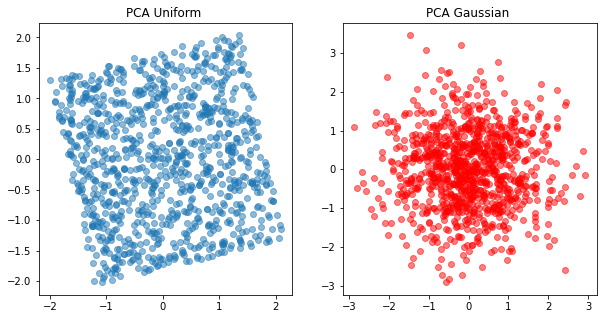

In [28]:
# PCA y whitening the dataset
from sklearn.decomposition import PCA 
U_pca = PCA(whiten=True).fit_transform(U_mix)
G_pca = PCA(whiten=True).fit_transform(G_mix)

# Grafica de los datasets
fig  = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
ax1.set_title("PCA Uniform ")
ax1.scatter(U_pca[:, 0], U_pca[:,1], marker = "o", alpha=0.5)

ax2 = fig.add_subplot(122)
ax2.set_title("PCA Gaussian ")
ax2.scatter(G_pca[:, 0], G_pca[:, 1], marker = "o", color='r', alpha=0.5);

Esto es simplemente para mostrar que lo que se denomina *PCA whitening* se puede llevar a cabo estandarizando primero los datos:

#### Discusión sobre la necesidad del supuesto no Gaussiano

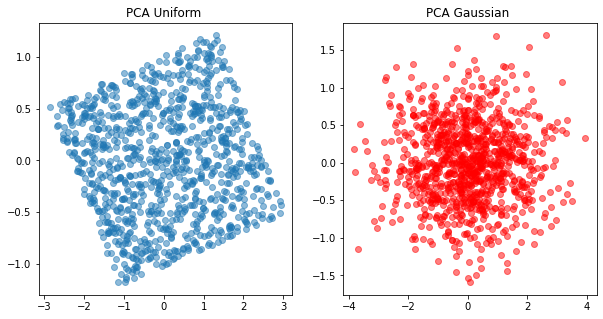

In [29]:
# PCA y whitening the dataset
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

U_std = StandardScaler().fit_transform(U_mix)
G_std = StandardScaler().fit_transform(G_mix)

U_pca = PCA().fit_transform(U_std)
G_pca = PCA().fit_transform(G_std)

# Grafica de los datasets
fig  = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
ax1.set_title("PCA Uniform ")
ax1.scatter(U_pca[:, 0], U_pca[:,1], marker = "o", alpha=0.5)

ax2 = fig.add_subplot(122)
ax2.set_title("PCA Gaussian ")
ax2.scatter(G_pca[:, 0], G_pca[:, 1], marker = "o", color='r', alpha=0.5);

Hablemos un poco sobre el segundo supuesto que hace ICA:

- "*Las señales de origen tienen una distribución no Gaussiana*".

Esta suposición proviene del teorema del límite central. Según el teorema del límite central, la suma de las variables aleatorias independientes es más Gaussiana que las variables independientes. Entonces, para inferir las variables de origen tenemos que alejarnos de la "Gaussianidad". En el caso de la distribución Gaussiana, las variables Gaussianas no correlacionadas también son independientes (es una propiedad única asociada con la distribución Gaussiana).
Si observamos las gráficas anteriores, `U_pca` se puede multiplicar por una matriz de rotación adecuada para obtener las señales originales. No se puede decir lo mismo del `G_pca` ya que es rotacionalmente simétrica. No importa cuál sea la matriz de rotación, se verá igual. Por lo tanto, en el caso de las variables Gaussianas posteriores al PCA, no podemos obtener más información.

### Involucrando un poco más de teoría
En esta sección veremos cómo se puede relacionar la obtención de las componentes independientes a través de la información mutua (y la entropía), de una forma relativamente sencilla y rápida. Si desean saber más detalle hay dos fuentes importantes: les recomiendo las referencias [[1]](#ICApaper) (es un artículo que explica todo ICA de forma resumida) y [[2]](#ICAbook) (es un libro muy detallado, que incluye conceptos básicos como la entropía y la información mutua hasta llegar a ICA).

#### Eliminando la dependencia no lineal
Podemos minimizar la dependencia no lineal reduciendo la información mutua entre las variables. A partir de la teoría de la información, la información mutua se puede definir como

$$MI = \text{sum of Entropies of marginal distribution functions} - \text{Entropy of joint distribution function}$$

Ahora, la entropía es una medida de la información promedio contenida en un dato. Para una variable $y$ con $\texttt{pdf}$ $p(y)$, viene dada por
$$ H(y) = - \sum_{i}p(y_i)  \log\left(p(y_i)\right)$$


Entonces, para las $m$ variables aleatorias (escalars), $y_i$, $i=1, \dots, m$, tenemos que minimizar la siguiente función:

$$MI(y_1,y_2, \dots, y_m) = \sum_{i=1}^{m} H(y_i) - H(\mathbf{y})$$

donde $H (\mathbf{y}) $ es la entropía multidimensional de un vector aleatorio $\mathbf{y}$. Esta entropía puede ser vista como $H \left (p (y _1, y_ 2, \dots, y_m \right)) $.

Una propiedad importante de la información mutua es que para una transformación lineal invertible $\mathbf{y}=\mathbf{W} \mathbf{x}$ tenemos que:
$$
MI\left(y_{1}, y_{2}, \ldots, y_{n}\right)=\sum_{i} H\left(y_{i}\right)-H(\mathbf{x})-\log |\operatorname{det} \mathbf{W}|
$$

Suponga que $\mathbf{W}$ es la matriz de transformación que necesitamos multiplicar con $\mathbf{x}$ para eliminar la dependencia de orden superior. Entonces, podemos definir
$$MI = \sum_{i} H(\mathbf{w}_i^T \mathbf{x}_{pca_{i}}) - H(\mathbf{W} \mathbf{X}_{pca})$$
Por lo tanto, usando la propiedad anterior:
$$MI =  \sum_{i}H(\mathbf{w}_i^T \mathbf{x}_{pca_{i}}) - H(\mathbf{X}_{pca}) +\log(\operatorname{det}(\mathbf{W}))$$
Dado que $\mathbf{W}$ es una matriz de rotación, su determinante es 1, por lo tanto, $\log(\operatorname{det}(\mathbf{W})) = 0$. Ahora, $H(\mathbf{X_{pca}})$ no depende de $\mathbf{W}$, por lo que podemos eliminarlo.

Entonces, obtenemos
$$MI =  \sum_{i}H(\mathbf{w}_i^T \mathbf{x}_{pca_{i}})$$
Por lo tanto,
$$\mathbf{W} = \arg\min_{\mathbf{W}} \; \sum_{i}H(\mathbf{w}_i^T \mathbf{x}_{pca_{i}})$$

Hay otro método para encontrar la matriz $\mathbf{W}$ usando la **negentropía** que viene dada por

$$J(\mathbf{y}) = H(\mathbf{y}_{gauss}) - H(\mathbf{y})$$
Donde $H$ es entropía, $\mathbf{y}$ es nuestro $\mathbf{x}_{pca}$ y $\mathbf{y}_{gauss}$ es un vector aleatorio gaussiano con la misma covarianza que $\mathbf{y}$
      
Entre todas las distribuciones, la distribución gaussiana tiene la entropía más alta. La negentropía es cero si $\mathbf{y}$ es gaussiano y distinto de cero si $\mathbf{y}$ no es gaussiano. Podemos maximizar la función de negentropía para obtener la matriz $\mathbf{W}$.
También para $y_i$ de varianza unitaria, $$MI(y_1,y_2,\dots,y_m) = constant  - \sum_{i}J(y_i)$$

Ahora, ambos métodos requieren el cálculo de la entropía. El cálculo de la entropía es difícil porque necesitamos conocer el pdf de las variables que no se conoce.

Podemos aproximar la negentropía con algunas funciones adecuadas (no cuadráticas) $G$, ya que $J(y) \propto[E\{G(y)\}-E\{G(v)\}]^{2}$, donde ν es una variable gaussiana de media cero y varianza unitaria. Algunos ejemplos útiles son $G_{1}(u)=\frac{1}{a_{1}} \log \cosh a_{1} u \quad$   y   $\quad G_{2}(u)=-\exp \left(-u^{2} / 2\right)$. Usaremos también sus derivadas:

- $g_1(u) =  \tanh(a u\,)$
- $g_2(u) = -u \exp(\,-u^2\,/\,2\,)$


donde $1 \leq a \leq 2$ es una constante adecuada.

#### FastICA

After taking derivative of the negentropy and using langrange multipliers to optimize the function we get a nice formula for updating current estimate of $\mathbf{w}$ (a row vector of $\mathbf{W}$):

- $\mathbf{w}:=E\left\{\mathbf{x} g\left(\mathbf{w}^{T} \mathbf{x}\right)\right\}-E\left\{g^{\prime}\left(\mathbf{w}^{T} \mathbf{x}\right)\right\} \mathbf{w}$ 
- $\mathbf{w}:=\mathbf{w} /\left\|\mathbf{w}\right\|$
 
 where $G$ is approximating function, $g$ is derivative of $G$ and $g^\prime$ is the second derivate of $G$.


The pseudocode for finding the $\mathbf{W}$ matrix is:

1. For $i$ in (1,number of sources):
2.    $\hspace{1em}\mathbf{w_i}$ = random vector (initialization of  $\mathbf{w_i}$)
3.    $\hspace{1em}$While $\mathbf{w}$ changes:
4.    $\hspace{2em}\mathbf{w}:=E\left\{\mathbf{x} g\left(\mathbf{w}^{T} \mathbf{x}\right)\right\}-E\left\{g^{\prime}\left(\mathbf{w}^{T} \mathbf{x}\right)\right\} \mathbf{w}$ $\hspace{2em}$(update of $\mathbf{w}$)
5.    $\hspace{2em}\mathbf{w}_{i} := \mathbf{w}_{i}-\sum_{j=1}^{i-1}\left(\mathbf{w}_{i}^{T} \mathbf{w}_{j}\right) \mathbf{w}_{j}$   $\hspace{6em}$(orthogonalization of $\mathbf{w}_i$ w.r.t other vectors of $\mathbf{W}$ using gram-schmidt process)
6.    $\hspace{2em}\mathbf{w}:=\mathbf{w} /\left\|\mathbf{w}\right\|$
 
In the above alogirthm we are using gram-schmidt process for obtaining a $\mathbf{w}_i$ such that it is orthogonal to all other $\mathbf{w}$ vectors obtained earlier.  

Let's implement the ICA algorithm.  



#### FastICA

Después de tomar la derivada de la negentropía y usar multiplicadores de langrange para optimizar la función, obtenemos una buena fórmula para actualizar la estimación actual de $\mathbf{w}$ (un vector de fila de $\mathbf{W}$):

- $\mathbf{w}:=E\left\{\mathbf{x} g\left(\mathbf{w}^{T} \mathbf{x}\right)\right\}-E\left\{g^{\prime}\left(\mathbf{w}^{T} \mathbf{x}\right)\right\} \mathbf{w}$
- $\mathbf{w}:=\mathbf{w} /\left\|\mathbf{w}\right\|$
 
 donde $G$ es una función aproximada, $g$ es una derivada de $G$ y $g^\prime$ es la segunda derivada de $G$.


El pseudocódigo para encontrar la matriz $\mathbf{W}$ es:

1. Para $i$ en (1, número de fuentes):
2. $\hspace{1em}\mathbf{w_i}$ = vector aleatorio (inicialización de $\mathbf{w_i}$)
3. $\hspace{1em}$Mientras que $\mathbf{w}$ cambie:
4. $\hspace{2em}\mathbf{w}:=E\left\{\mathbf{x} g\left(\mathbf{w}^{T} \mathbf{x}\right)\right\}-E\left\{g^{\prime}\left(\mathbf{w}^{T} \mathbf{x}\right)\right\} \mathbf{w}$ $\hspace{2em}$ (actualización de $\mathbf{w}$)
5. $\hspace{2em}\mathbf{w}_{i} := \mathbf{w}_{i}-\sum_{j=1}^{i-1}\left(\mathbf{w}_{i}^{T} \mathbf{w}_{j}\right) \mathbf{w}_{j}$ $\hspace{6em}$ (ortogonalización de $\mathbf{w}_i$ con otros vectores de $\mathbf{W}$ usando el proceso gram-schmidt)
6. $\hspace{2em}\mathbf{w}:=\mathbf{w} /\left\|\mathbf{w}\right\|$
 
En el algoritmo anterior, estamos usando el proceso de gram-schmidt para obtener un $\mathbf{w}_i$ tal que sea ortogonal a todos los demás vectores de $\mathbf{w}$ obtenidos anteriormente.

A continuacióñ, implementemos el algoritmo ICA.

In [30]:
# usando la funcion de aproximacion g(x) = xexp(-x**2/2)
def g(x):
    return x * np.exp(-(x**2)/2)

def gprime(x):
    return (1 - x**2) * np.exp(-(x**2)/2)


# actualizacion de w_i
def update_vector(W, X):
    
    Y1 = W.dot(X)
    f1 =  (X * g(Y1)).mean(axis = 1)
    f2 = gprime(Y1).mean() * W
    W = f1 - f2
    return(W)

# ortonormalizacion de w_i
def orthonormalize(W, w, k):
    
    C= np.zeros_like(w)
    for j in range(k):
        
        C = C + np.dot(w, W[j].T) * W[j]
    w = w - C
    
    return(w /np.sqrt((w * w).sum()))

# calculo de la matriz no mezclada
# X.shape = numero de caracteristicas, numero de muestras
def calculate_W(X, W_init):
    
    n_f, n_sample = X.shape
    W = np.zeros((n_f, n_f))
    
    for i in range(n_f):
        
        w = W_init[i, :].copy()
        w /= np.sqrt((w**2).sum())
        w_old = np.zeros((1, n_f))
        j=0
        max_iter = 1000
        while (np.abs(np.abs((w*w_old).sum())-1) > 1e-3 and (j < max_iter-1)):
            w_old = w
            w = update_vector(w, X)
            
            w = orthonormalize(W, w, i)
            
            j +=1
        
        W[i, :] = w
        
        
    return W

Hemos implementado el algoritmo de ICA, pero no sabemos cuántas o qué componentes seleccionar.
ICA no nos dice nada sobre el orden de los componentes o cuántos de ellos son relevantes. Por lo tanto, es difícil encontrar el número correcto de componentes. Podemos restringir la cantidad de componentes usando PCA, y luego encontrar la misma cantidad de componentes independientes.

In [31]:

# Selección del número de componentes
# W = matrix no mezclada
# S = matriz de las senales fuente
def ICA(X, n_comp=None):
    
    X = (X - X.mean(axis = 0))/(X.std(axis=0))
    pca = PCA(whiten=True)
    X_pca = pca.fit_transform(X)
    explained_var = pca.explained_variance_
    if not n_comp:
        n_comp = np.argmax(np.cumsum(explained_var)/explained_var.sum() > 0.99)+1
    K = pca.components_[0:n_comp]/pca.singular_values_
    X_pca = X_pca[:,0:n_comp]
    W_init = np.random.rand(n_comp, n_comp)
    W = calculate_W(X_pca.T, W_init)
    S = W.dot(X_pca.T)
    
    W_sel = W.dot(K)
    
    return(W_sel, S,W,K)

Ahora probemos el algoritmo ICA y la selección de componentes con una mezcla de tres señales diferentes:

In [32]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

# Genera la muestra de los datos
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Senyal 1 : senyal sinusoidal
s2 = np.sign(np.sin(3 * time))  # Senyal 2 : senyal cuadrada
s3 = signal.sawtooth(2 * np.pi * time)  # Senyal 3: senyal dientes de sierra

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # anyade ruido

S /= S.std(axis=0)  # estandariza los datos
# mezcla los datos
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # matriz de mezcla
X = np.dot(S, A.T)  # genera las observaciones

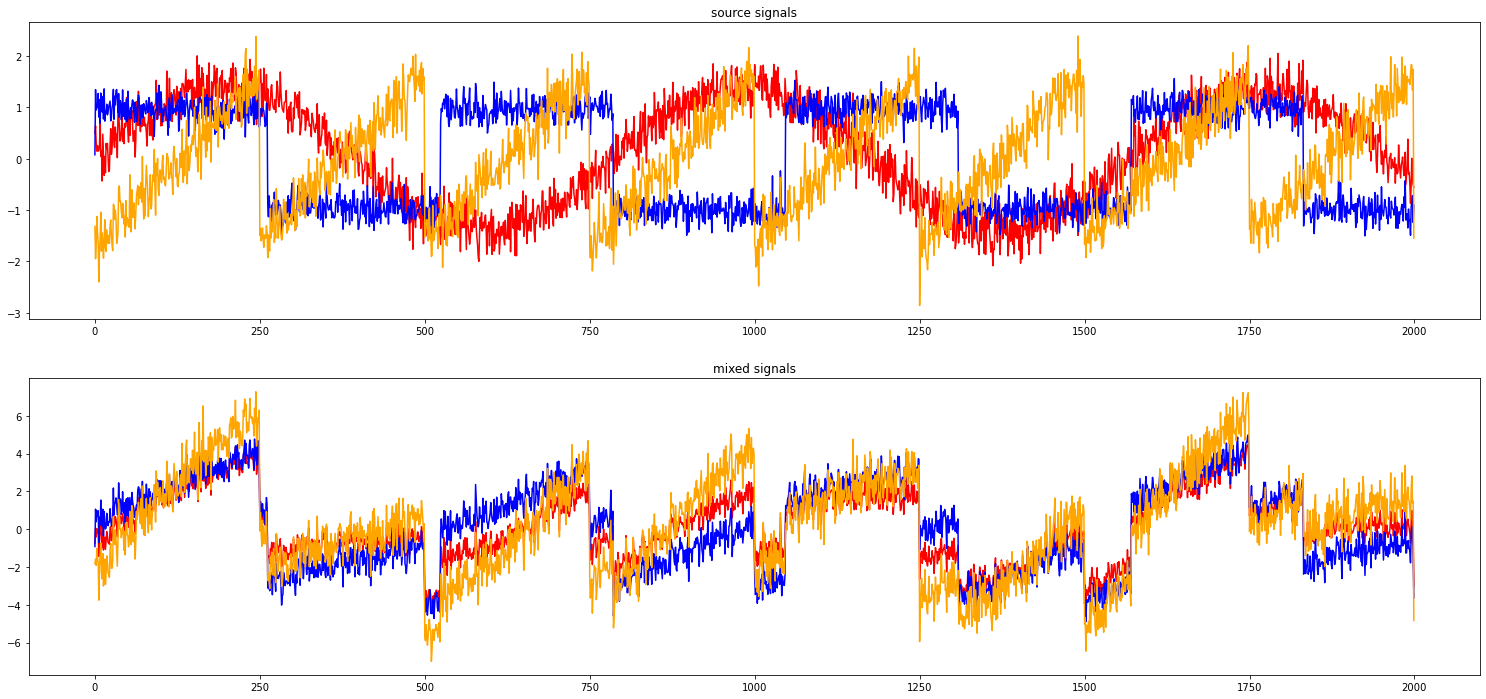

In [33]:
# Grafica las senyales simuladas
plt.figure(figsize =(26,12) )
colors = ['red', 'blue', 'orange']

plt.subplot(2,1,1)
plt.title('source signals')
for color, series in zip(colors, S.T):
    plt.plot(series, color)
plt.subplot(2,1,2)
plt.title('mixed signals')
for color, series in zip(colors, X.T):
    plt.plot(series, color)

In [34]:
Wsel, S_,V_ , K_= ICA(X, 3)

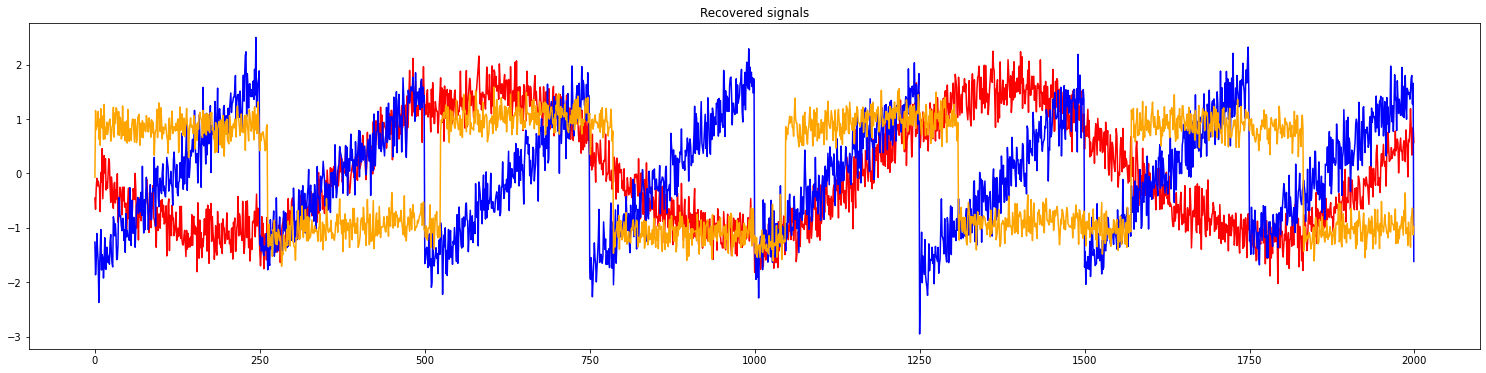

In [37]:
plt.figure(figsize =(26,6) )
plt.title('Recovered signals')
for color, series in zip(colors, S_):
    
    plt.plot(series, color)


## Implementacion en Scikit-learn

In [66]:
transformer = FastICA(n_components=3,random_state=42)
X_transformed = transformer.fit_transform(X)
X_transformed.shape

(2000, 3)

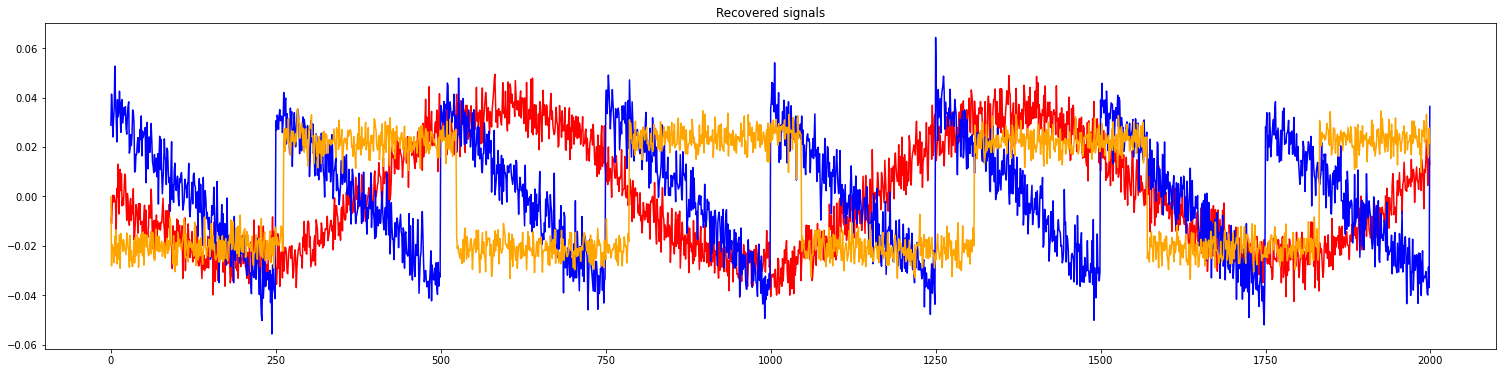

In [65]:
plt.figure(figsize =(26,6) )
plt.title('Recovered signals')
for color, series in zip(colors, X_transformed.T):
    
    plt.plot(series, color)

Tarea: Visualización del conjunto de datos **MNIST** utilizando ICA

### Ventajas e inconvenientes
ICA es una herramienta importante en neuroimagen. Se utiliza para la separación espacial y temporal de señales de EEG y fMRI. ICA no tiene una solución de forma cerrada. Encontrar el número de componentes independientes y su orden es difícil.

## Referencias

<a id='ICApaper'></a>[1] [Hyvärinen A, Oja E. Independent component analysis: algorithms and applications. Neural networks. 2000 Jun 1;13(4-5):411-30.](http://www.mriquestions.com/uploads/3/4/5/7/34572113/ica_math.pdf) 


<a id='ICAbook'></a>[2] [Hyvärinen A, Karhunen J, Oja E. Independent Component Analysis, 500 John Wiley & Sons. NJ, USA. 2001;501.](https://www.cs.helsinki.fi/u/ahyvarin/papers/bookfinal_ICA.pdf)

[3] https://en.wikipedia.org/wiki/FastICA

# Ejercicio

Cargue el dataset de sklearn.datasets.fetch_olivetti_faces y realice una descomposición de las imágenes de los rostros usando PCA e ICA para algunas componentes. Visualice las componentes para cada caso. ¿Qué significa cada componente en cada método?